In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [218]:
no_test = 10000000

def plot_surface_data_10x(ax, d, k):
    ts = [10,20,30,40,50,60,70,80,90,100]
    data = {
        4: [0.0009749906381966876,0.0018925606173508852,0.0028415737457666004,0.003821533447282232,0.004748935976252471,0.005683977372666963,0.006482923652897769,0.007465529062238135,0.008319757970677216,0.009514153959060766],
        5: [0.0001153,0.0002329,0.0003738,0.0004861,0.0006101471224393918,0.0007305381834939684,0.0008300894913789656,0.0009644065911629814,0.0010855207980555019,0.0012178707429937115],
        6: [5.37e-05,0.0001097,0.0001553,0.0002055,0.0002641,0.0003168,0.0003751,0.000448,0.0004849,0.0005290595643646124],
        7: [8.4e-06,1.91e-05,2.72e-05,3.72e-05,4.66e-05,5.82e-05,6.87e-05,7.78e-05,9.02e-05,9.88e-05]
    }
    ax.plot(ts[:8], [1-(1-a)**k for a in data[d]][:8], '-o', c='k', label=f"Surface code: [[{d**2*k},{k},{d}]] ({(2*d**2-1)*k} qubits)")

def plot_surface_data(ax, d, k):
    ts = [10,20,30,40,50,60,70,80,90,100]
    data = {
        4: [0.0018403432365179412,0.003548884836582971,0.005237650883477318,0.007009329456665087,0.00840560329087456,0.0105202064820794,0.01219697646294924,0.013865183674463015,0.015314132520496883,0.01715576234983606],
        5: [0.0002723,0.0005522729795094148,0.0008386979167081266,0.0011151446076454652,0.0014134666568070217,0.0016878039413872328,0.0019517033589881271,0.002296813870443364,0.0025723677714511403,0.0028566649941461782],
        6: [0.0001253,0.0002542,0.0003836,0.0005061233422585084,0.0006370462446168446,0.0007557720022841242,0.000895625954188077,0.0010187308860719292,0.0011239277522523494,0.0012853476839334776],
        7: [2.57e-05,5.98e-05,8.27e-05,0.000113,0.0001406,0.0001667,0.0001895,0.0002301,0.0002509,0.0002893]
    }
    labels  = {
        4: '-o',
        5: '-.o',
        6: ':o',
        7: '--o'
    }
    print([1-(1-a)**k for a in data[d]][:8])
    ax.plot(ts[:8], [1-(1-a)**k for a in data[d]][:8], labels[d], c='k', label=f"Surface code: [[{d**2*k},{k},{d}]] ({(2*d**2-1)*k} qubits)")

[0.0032627107180073223, 0.006607182406986101, 0.010018079208445774, 0.013299965474666053, 0.01683035857156323, 0.020066688032741253, 0.02317066506295773, 0.027216244990565075]
[0.001502564226726677, 0.003046138847370705, 0.0045935005761239545, 0.006056601982142751, 0.007617827088239659, 0.009031660210913395, 0.010694727559105166, 0.012156507063174615]
[0.00030835641139437264, 0.0007173640284007243, 0.000991948731270731, 0.0013551575633570234, 0.0016858958995220608, 0.0019985669520071747, 0.0022716314199596743, 0.002757708242185908]


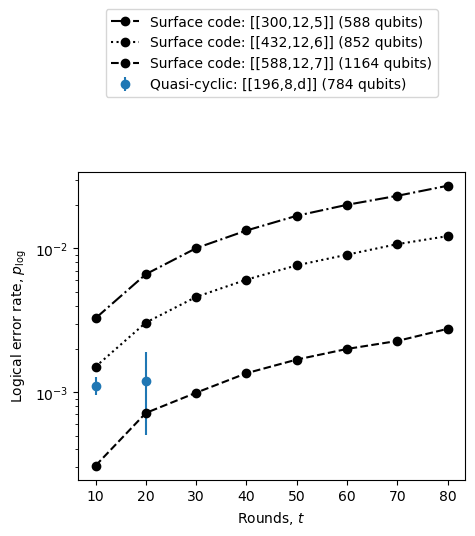

In [219]:
fig, ax = plt.subplots(1, 1, figsize=(5,4), sharey=True)

# codes = [[12,3],[9,5],[12,5],[15,5]]#,[21,5]]
codes = [[14,7]]

for code in codes:
    df = pd.read_csv(f'./{code[0]}_{code[1]}/full_circuit_results_5.res')
    df['p_error'] = 1 - df['p_log']
    df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['no_test'])
    # df['p_std_dev'].replace(to_replace=0, value=1e-2, inplace=True)
    guesses = []
    params = []

    def fun(x, a):
        return 1 - (1 - a)**x

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    tmp_df = df[(df['p_std_dev'] > 0) & (df['p_phys'] == 0.0001)]

        # tmp_df_fit = df[(df['p_mask'] == j) & (df['algo'] >= 200)]
        # tmp_df_before = df[(df['p_mask'] == j) & (df['algo'] < 200) & (df['algo'] > 10)]

    ax.errorbar(tmp_df['t'], tmp_df['p_error'], tmp_df['p_std_dev'], fmt='o', label=f"Quasi-cyclic: [[{code[0]*code[1]*2},8,d]] ({code[0]*code[1]*8} qubits)")
# ax.plot(ts, p_error, '-o', c='k', label="Surface code: [[712,8,6]]")
# plot_surface_data(ax, 4, 12)
plot_surface_data(ax, 5, 12)
plot_surface_data(ax, 6, 12)
plot_surface_data(ax, 7, 12)


# popt, pcov = curve_fit(fun, tmp_df['t'], tmp_df['p_error'], maxfev=1000, p0=(0.001),
#     sigma=tmp_df['p_std_dev'])
# xx = np.linspace(1, 100, 1000)
# yy = fun(xx, *popt)
# ax.plot(xx, yy, c='k')


# ax.plot(np.linspace(0, 0.05, 100), np.linspace(1e-3, 50*1e-3, 100), c='k')
# ax[1].plot(np.linspace(1e-3,1e-2,100), np.linspace(1e-3, 1e-2, 100), c='k')

# ax.set_title('ISD with $p_0 = 0.001$')
# ax[1].set_title('SSF with $k=1$')
# ax.legend(loc='lower right')
ax.set_yscale('log')
ax.set_ylabel('Logical error rate, $p_\log$')
ax.set_xlabel('Rounds, $t$')
ax.legend(loc='upper center', bbox_to_anchor=(0.5,1.55), fancybox=True)
# ax[1].set_xlabel('$p$')

# handles, labels = plt.gca().get_legend_handles_labels()
# order = [3,2,1,0]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

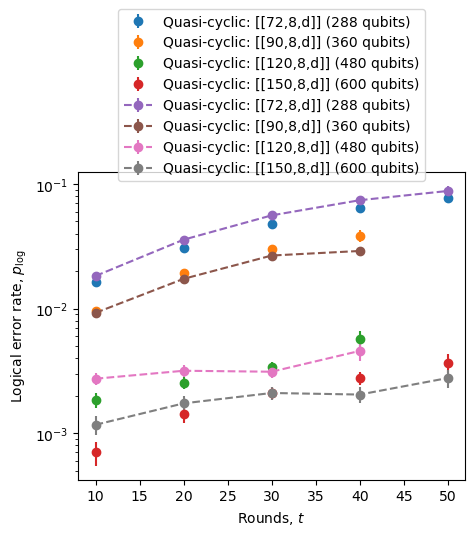

In [205]:
fig, ax = plt.subplots(1, 1, figsize=(5,4), sharey=True)

codes = [[12,3],[9,5],[12,5],[15,5]]#,[21,5]]

for code in codes:
    df = pd.read_csv(f'./{code[0]}_{code[1]}/full_circuit_results_5.res')
    df['p_error'] = 1 - df['p_log']
    df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['no_test'])
    # df['p_std_dev'].replace(to_replace=0, value=1e-2, inplace=True)
    guesses = []
    params = []

    def fun(x, a):
        return 1 - (1 - a)**x

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    tmp_df = df[(df['p_std_dev'] > 0) & (df['p_phys'] == 0.0001)]

        # tmp_df_fit = df[(df['p_mask'] == j) & (df['algo'] >= 200)]
        # tmp_df_before = df[(df['p_mask'] == j) & (df['algo'] < 200) & (df['algo'] > 10)]

    ax.errorbar(tmp_df['t'], tmp_df['p_error'], tmp_df['p_std_dev'], fmt='o', label=f"Quasi-cyclic: [[{code[0]*code[1]*2},8,d]] ({code[0]*code[1]*8} qubits)")

for code in codes:
    df = pd.read_csv(f'./{code[0]}_{code[1]}/full_circuit_results_1.res')
    df['p_error'] = 1 - df['p_log']
    df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['no_test'])
    # df['p_std_dev'].replace(to_replace=0, value=1e-2, inplace=True)
    guesses = []
    params = []

    def fun(x, a):
        return 1 - (1 - a)**x

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    tmp_df = df[(df['p_std_dev'] > 0) & (df['p_phys'] == 0.0001)]

        # tmp_df_fit = df[(df['p_mask'] == j) & (df['algo'] >= 200)]
        # tmp_df_before = df[(df['p_mask'] == j) & (df['algo'] < 200) & (df['algo'] > 10)]

    ax.errorbar(tmp_df['t'], tmp_df['p_error'], tmp_df['p_std_dev'], fmt='--o', label=f"Quasi-cyclic: [[{code[0]*code[1]*2},8,d]] ({code[0]*code[1]*8} qubits)")
# ax.plot(ts, p_error, '-o', c='k', label="Surface code: [[712,8,6]]")


# popt, pcov = curve_fit(fun, tmp_df['t'], tmp_df['p_error'], maxfev=1000, p0=(0.001),
#     sigma=tmp_df['p_std_dev'])
# xx = np.linspace(1, 100, 1000)
# yy = fun(xx, *popt)
# ax.plot(xx, yy, c='k')


# ax.plot(np.linspace(0, 0.05, 100), np.linspace(1e-3, 50*1e-3, 100), c='k')
# ax[1].plot(np.linspace(1e-3,1e-2,100), np.linspace(1e-3, 1e-2, 100), c='k')

# ax.set_title('ISD with $p_0 = 0.001$')
# ax[1].set_title('SSF with $k=1$')
# ax.legend(loc='lower right')
ax.set_yscale('log')
ax.set_ylabel('Logical error rate, $p_\log$')
ax.set_xlabel('Rounds, $t$')
ax.legend(loc='upper center', bbox_to_anchor=(0.5,1.55), fancybox=True)
# ax[1].set_xlabel('$p$')

# handles, labels = plt.gca().get_legend_handles_labels()
# order = [3,2,1,0]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

In [135]:
# arr = [0.0001153,0.0002329,0.0004861,0.0003738,0.0006101471224393918,0.0007305381834939684,0.0008300894913789656,0.0009644065911629814,0.0010855207980555019,0.0012178707429937115]
arr = [0.0009749906381966876,0.0028415737457666004,0.0018925606173508852,0.003821533447282232,0.004748935976252471,0.005683977372666963,0.006482923652897769,0.007465529062238135,0.008319757970677216,0.009514153959060766]

for a in arr:
    print(1-(1-a)**12)

0.011637351069796575
0.03357098086208976
0.02247581454562475
0.04490670288315657
0.055522085894850526
0.0661153147944995
0.07508029331495203
0.08599791578306315
0.09539303630467622
0.10838105723337066


In [144]:
data = {
    4: 4
}
data[4]

4